<a href="https://colab.research.google.com/github/superbunny38/2021DataScience/blob/main/corona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [333]:
import pandas as pd
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
from urllib.parse import unquote, quote_plus, urlencode

In [334]:
url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19InfStateJson'
serviceKey = 'UIZ4nR8Yx%2FM2qRLipwYmfJVi%2B6Fl8uCyx4gSk7S07xo1oOkiRf3hHp8xiiBljk2z6YDG5Kxrq3gCnA3jVWZJ4Q%3D%3D'
decodekey = 'UIZ4nR8Yx/M2qRLipwYmfJVi+6Fl8uCyx4gSk7S07xo1oOkiRf3hHp8xiiBljk2z6YDG5Kxrq3gCnA3jVWZJ4Q=='

In [335]:
import requests
from bs4 import BeautifulSoup as bs
from urllib import parse
startCreateDt = 2019414
endCreateDt = 20210707
params = {'ServiceKey':parse.unquote(serviceKey), # 서비스키(필수)
          'startCreateDt':startCreateDt, # 데이터 생성일 시작범위(선택)
          'endCreateDt':endCreateDt # 데이터 생성일 종료범위(선택)
}

res = requests.get(url, params=params)
soup = bs(res.text, 'lxml')
'''
query_params = '?' + urlencode({
    quote_plus('serviceKey'): decodekey,
    quote_plus('startCreateDt'): startCreateDt,
    quote_plus('endCreateDt'): endCreateDt
})

URL = url + query_params'''

"\nquery_params = '?' + urlencode({\n    quote_plus('serviceKey'): decodekey,\n    quote_plus('startCreateDt'): startCreateDt,\n    quote_plus('endCreateDt'): endCreateDt\n})\n\nURL = url + query_params"

In [336]:
items = soup.find_all('item')
print(items)

[<item><accdefrate>1.5319725965</accdefrate><accexamcnt>10766502</accexamcnt><accexamcompcnt>10623754</accexamcompcnt><carecnt>9220</carecnt><clearcnt>151500</clearcnt><createdt>2021-07-07 09:41:09.863</createdt><deathcnt>2033</deathcnt><decidecnt>162753</decidecnt><examcnt>142748</examcnt><resutlnegcnt>10461001</resutlnegcnt><seq>565</seq><statedt>20210707</statedt><statetime>00:00</statetime><updatedt>null</updatedt></item>, <item><accdefrate>1.5248323652</accdefrate><accexamcnt>10735716</accexamcnt><accexamcompcnt>10594017</accexamcompcnt><carecnt>8749</carecnt><clearcnt>150760</clearcnt><createdt>2021-07-06 09:42:40.275</createdt><deathcnt>2032</deathcnt><decidecnt>161541</decidecnt><examcnt>141699</examcnt><resutlnegcnt>10432476</resutlnegcnt><seq>564</seq><statedt>20210706</statedt><statetime>00:00</statetime><updatedt>null</updatedt></item>, <item><accdefrate>1.5219245826</accdefrate><accexamcnt>10700134</accexamcnt><accexamcompcnt>10565241</accexamcompcnt><carecnt>8723</carecnt

In [337]:
# 리스트 원소 확인
for x in items:
    print(x)
    print()

<item><accdefrate>1.5319725965</accdefrate><accexamcnt>10766502</accexamcnt><accexamcompcnt>10623754</accexamcompcnt><carecnt>9220</carecnt><clearcnt>151500</clearcnt><createdt>2021-07-07 09:41:09.863</createdt><deathcnt>2033</deathcnt><decidecnt>162753</decidecnt><examcnt>142748</examcnt><resutlnegcnt>10461001</resutlnegcnt><seq>565</seq><statedt>20210707</statedt><statetime>00:00</statetime><updatedt>null</updatedt></item>

<item><accdefrate>1.5248323652</accdefrate><accexamcnt>10735716</accexamcnt><accexamcompcnt>10594017</accexamcompcnt><carecnt>8749</carecnt><clearcnt>150760</clearcnt><createdt>2021-07-06 09:42:40.275</createdt><deathcnt>2032</deathcnt><decidecnt>161541</decidecnt><examcnt>141699</examcnt><resutlnegcnt>10432476</resutlnegcnt><seq>564</seq><statedt>20210706</statedt><statetime>00:00</statetime><updatedt>null</updatedt></item>

<item><accdefrate>1.5219245826</accdefrate><accexamcnt>10700134</accexamcnt><accexamcompcnt>10565241</accexamcompcnt><carecnt>8723</carecnt>

In [338]:
response = {'seq': '고유번호',
            'statedt': '기준일',
            'statetime': '기준시간',
            'decidecnt': '확진자',
            'clearcnt': '격리해제',
            'examcnt': '검사진행',
            'deathcnt': '사망자',
            'carecnt': '치료중',
            'resutlnegcnt': '음성',
            'accexamcnt': '누적검사',
            'accexamcompcnt': '누적검사완료',
            'accdefrate': '누적확진률',
            'createdt': '등록일시',
            'updatedt': '수정'}

In [339]:
# xml을 dictionary로 바꿔 리스트 원소로 추가
lst = []
for y in items:
    l = {}
    for x in y:
        l[x.name] = x.text
    lst.append(l)
lst

[{'accdefrate': '1.5319725965',
  'accexamcnt': '10766502',
  'accexamcompcnt': '10623754',
  'carecnt': '9220',
  'clearcnt': '151500',
  'createdt': '2021-07-07 09:41:09.863',
  'deathcnt': '2033',
  'decidecnt': '162753',
  'examcnt': '142748',
  'resutlnegcnt': '10461001',
  'seq': '565',
  'statedt': '20210707',
  'statetime': '00:00',
  'updatedt': 'null'},
 {'accdefrate': '1.5248323652',
  'accexamcnt': '10735716',
  'accexamcompcnt': '10594017',
  'carecnt': '8749',
  'clearcnt': '150760',
  'createdt': '2021-07-06 09:42:40.275',
  'deathcnt': '2032',
  'decidecnt': '161541',
  'examcnt': '141699',
  'resutlnegcnt': '10432476',
  'seq': '564',
  'statedt': '20210706',
  'statetime': '00:00',
  'updatedt': 'null'},
 {'accdefrate': '1.5219245826',
  'accexamcnt': '10700134',
  'accexamcompcnt': '10565241',
  'carecnt': '8723',
  'clearcnt': '150044',
  'createdt': '2021-07-05 09:53:08.163',
  'deathcnt': '2028',
  'decidecnt': '160795',
  'examcnt': '134893',
  'resutlnegcnt': '1

In [340]:
# list를 dataframe으로 만들기
df = pd.DataFrame(lst)
df.columns = df.columns.map(response)
df

,누적확진률,누적검사,누적검사완료,치료중,격리해제,등록일시,사망자,확진자,검사진행,음성,고유번호,기준일,기준시간,수정
0,1.5319725965,10766502,10623754,9220,151500,2021-07-07 09:41:09.863,2033,162753,142748,10461001,565,20210707,00:00,null
1,1.5248323652,10735716,10594017,8749,150760,2021-07-06 09:42:40.275,2032,161541,141699,10432476,564,20210706,00:00,null
2,1.5219245826,10700134,10565241,8723,150044,2021-07-05 09:53:08.163,2028,160795,134893,10404446,563,20210705,00:00,null
3,1.5175524712,10685125,10548828,8444,149614,2021-07-04 09:33:38.815,2026,160084,136297,10388744,562,20210704,00:00,null
4,1.5122560101,10670617,10536708,8185,149132,2021-07-03 09:44:37.172,2025,159342,133909,10377366,561,20210703,00:00,null
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,NaN,NaN,NaN,NaN,0,2020-02-03 21:26:59.59,0,0,0,NaN,4,20200204,00:00,2020-02-03 21:26:59.59
520,NaN,NaN,NaN,NaN,0,2020-02-03 14:41:17.17,0,15,0,NaN,3,20200203,09:00,2020-02-03 14:41:17.17
521,NaN,NaN,NaN,NaN,2,2020-02-03 12:22:49.49,2,2,2,NaN,2,20200202,09:00,2020-02-03 12:22:49.49
522,NaN,NaN,NaN,NaN,1,2020-01-31 17:47:33.33,0,0,1,NaN,1,20200201,18:00,2020-01-31 17:47:33.33


In [341]:
!pip install xmltodict


In [342]:
import xmltodict
xmltodict.parse(str(items[0]))['item']

OrderedDict([('accdefrate', '1.5319725965'),
             ('accexamcnt', '10766502'),
             ('accexamcompcnt', '10623754'),
             ('carecnt', '9220'),
             ('clearcnt', '151500'),
             ('createdt', '2021-07-07 09:41:09.863'),
             ('deathcnt', '2033'),
             ('decidecnt', '162753'),
             ('examcnt', '142748'),
             ('resutlnegcnt', '10461001'),
             ('seq', '565'),
             ('statedt', '20210707'),
             ('statetime', '00:00'),
             ('updatedt', 'null')])

In [343]:
import xmltodict

dic2 = dict(covid19=[])
for item in items:
    dic2['covid19'].append(dict(xmltodict.parse(str(item))['item']))

# DataFrame으로 변환
df = pd.DataFrame(dic2['covid19'])
df.columns = df.columns.map(response) # column명에 map함수를 적용하여 한글로 변환
df

,누적확진률,누적검사,누적검사완료,치료중,격리해제,등록일시,사망자,확진자,검사진행,음성,고유번호,기준일,기준시간,수정
0,1.5319725965,10766502,10623754,9220,151500,2021-07-07 09:41:09.863,2033,162753,142748,10461001,565,20210707,00:00,null
1,1.5248323652,10735716,10594017,8749,150760,2021-07-06 09:42:40.275,2032,161541,141699,10432476,564,20210706,00:00,null
2,1.5219245826,10700134,10565241,8723,150044,2021-07-05 09:53:08.163,2028,160795,134893,10404446,563,20210705,00:00,null
3,1.5175524712,10685125,10548828,8444,149614,2021-07-04 09:33:38.815,2026,160084,136297,10388744,562,20210704,00:00,null
4,1.5122560101,10670617,10536708,8185,149132,2021-07-03 09:44:37.172,2025,159342,133909,10377366,561,20210703,00:00,null
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,NaN,NaN,NaN,NaN,0,2020-02-03 21:26:59.59,0,0,0,NaN,4,20200204,00:00,2020-02-03 21:26:59.59
520,NaN,NaN,NaN,NaN,0,2020-02-03 14:41:17.17,0,15,0,NaN,3,20200203,09:00,2020-02-03 14:41:17.17
521,NaN,NaN,NaN,NaN,2,2020-02-03 12:22:49.49,2,2,2,NaN,2,20200202,09:00,2020-02-03 12:22:49.49
522,NaN,NaN,NaN,NaN,1,2020-01-31 17:47:33.33,0,0,1,NaN,1,20200201,18:00,2020-01-31 17:47:33.33


In [344]:
df["누적확진률"].isna().sum()

31

In [345]:
20200101+31

20200132

In [346]:
df[df["기준일"]<str(20200131)]

,누적확진률,누적검사,누적검사완료,치료중,격리해제,등록일시,사망자,확진자,검사진행,음성,고유번호,기준일,기준시간,수정
523,None,NaN,NaN,NaN,1,2020-01-31 17:47:33.33,0,0,1,NaN,1,20200101,18:00,2020-02-03 12:21:56.56


In [347]:
df = df[:492]

In [348]:
int(df["확진자"][0])-int(df["확진자"][1])#0707 확진자 수: 0707-0706

1212

In [349]:
df.head()

,누적확진률,누적검사,누적검사완료,치료중,격리해제,등록일시,사망자,확진자,검사진행,음성,고유번호,기준일,기준시간,수정
0,1.5319725965,10766502,10623754,9220,151500,2021-07-07 09:41:09.863,2033,162753,142748,10461001,565,20210707,00:00,null
1,1.5248323652,10735716,10594017,8749,150760,2021-07-06 09:42:40.275,2032,161541,141699,10432476,564,20210706,00:00,null
2,1.5219245826,10700134,10565241,8723,150044,2021-07-05 09:53:08.163,2028,160795,134893,10404446,563,20210705,00:00,null
3,1.5175524712,10685125,10548828,8444,149614,2021-07-04 09:33:38.815,2026,160084,136297,10388744,562,20210704,00:00,null
4,1.5122560101,10670617,10536708,8185,149132,2021-07-03 09:44:37.172,2025,159342,133909,10377366,561,20210703,00:00,null


In [350]:
df.tail()

,누적확진률,누적검사,누적검사완료,치료중,격리해제,등록일시,사망자,확진자,검사진행,음성,고유번호,기준일,기준시간,수정
487,4.2675428362,178189,158569,6134,118,2020-03-07 11:00:45.45,44,6767,19620,151802,66,20200307,00:00,2020-03-07 11:00:45.45
488,4.3972345844,164740,142908,5643,108,2020-03-06 12:55:44.44,42,6284,21832,136624,65,20200306,00:00,2020-03-06 12:55:44.44
489,4.6227481540,146541,124731,5255,88,2020-03-05 10:15:12.12,35,5766,21810,118965,64,20200305,00:00,2020-03-05 10:15:12.12
490,4.9199855946,136707,108293,4750,41,2020-03-04 10:21:44.44,32,5328,28414,102965,63,20200304,00:00,2020-03-04 10:21:44.44
491,5.3291397182,125851,90296,4159,34,2020-03-03 10:46:53.53,28,4812,35555,85484,62,20200303,00:00,2020-03-03 10:46:53.53


In [351]:
data = df[["누적검사","치료중","격리해제","사망자","확진자","기준일"]]

In [352]:
data.head()

,누적검사,치료중,격리해제,사망자,확진자,기준일
0,10766502,9220,151500,2033,162753,20210707
1,10735716,8749,150760,2032,161541,20210706
2,10700134,8723,150044,2028,160795,20210705
3,10685125,8444,149614,2026,160084,20210704
4,10670617,8185,149132,2025,159342,20210703


In [353]:
data.tail()

,누적검사,치료중,격리해제,사망자,확진자,기준일
487,178189,6134,118,44,6767,20200307
488,164740,5643,108,42,6284,20200306
489,146541,5255,88,35,5766,20200305
490,136707,4750,41,32,5328,20200304
491,125851,4159,34,28,4812,20200303


In [354]:
data.isna().sum()

누적검사    0
치료중     0
격리해제    0
사망자     0
확진자     0
기준일     0
dtype: int64

In [355]:
data = data.sort_values(by=['기준일'],ascending=False)

In [356]:
data = data.reset_index(drop=True)

In [357]:
data[75:82]

,누적검사,치료중,격리해제,사망자,확진자,기준일
75,8583530,8576,107071,1811,117458,20210423
76,8537505,8394,106459,1808,116661,20210422
77,8497594,8243,105877,1806,115926,20210421
78,8458592,8166,105227,1802,115195,20210420
79,8414821,8371,104474,1801,114646,20210419
80,8396066,8311,104006,1797,114114,20210418
81,8377778,8055,103594,1794,113443,20210417


In [358]:
respective_confirmed = []
for i in range(len(data["확진자"])-1):
  if int(data["확진자"][i])-int(data["확진자"][i+1]) >0:
    respective_confirmed.append(int(data["확진자"][i])-int(data["확진자"][i+1]))
  else:
    print(f"{i}번째 문제")
    print(int(data["확진자"][i])-int(data["확진자"][i+1]))
  

In [359]:
respective_deads = []
for i in range(len(data["사망자"])-1):
  if int(data["사망자"][i])-int(data["사망자"][i+1]) >= 0:
    respective_deads.append(int(data["사망자"][i])-int(data["사망자"][i+1]))
  else:
    print(f"{i}번째 문제")
    print(int(data["사망자"][i])-int(data["사망자"][i+1]))
  

In [360]:
respective_recovers = []
for i in range(len(data["격리해제"])-1):
  if int(data["격리해제"][i])-int(data["격리해제"][i+1]) >= 0:
    respective_recovers.append(int(data["격리해제"][i])-int(data["격리해제"][i+1]))
  else:
    print(f"{i}번째 문제")
    print(int(data["격리해제"][i])-int(data["격리해제"][i+1]))
  

In [361]:
print(respective_confirmed[:3])

[1212, 746, 711]


In [362]:
print(len(respective_confirmed))

491


In [363]:
print(len(data))

492


In [364]:
print(len(respective_deads))

491


In [365]:
print(len(respective_recovers))

491


In [366]:
data.head()

,누적검사,치료중,격리해제,사망자,확진자,기준일
0,10766502,9220,151500,2033,162753,20210707
1,10735716,8749,150760,2032,161541,20210706
2,10700134,8723,150044,2028,160795,20210705
3,10685125,8444,149614,2026,160084,20210704
4,10670617,8185,149132,2025,159342,20210703


In [367]:
data.tail()

,누적검사,치료중,격리해제,사망자,확진자,기준일
487,178189,6134,118,44,6767,20200307
488,164740,5643,108,42,6284,20200306
489,146541,5255,88,35,5766,20200305
490,136707,4750,41,32,5328,20200304
491,125851,4159,34,28,4812,20200303


In [368]:
data = data[:-1]

In [369]:
data["respective_confirmed"] = np.array(respective_confirmed)

In [370]:
data["respective_deads"] = np.array(respective_deads)

In [371]:
data["respective_recovers"] = np.array(respective_recovers)

In [372]:
data.head()

,누적검사,치료중,격리해제,사망자,확진자,기준일,respective_confirmed,respective_deads,respective_recovers
0,10766502,9220,151500,2033,162753,20210707,1212,1,740
1,10735716,8749,150760,2032,161541,20210706,746,4,716
2,10700134,8723,150044,2028,160795,20210705,711,2,430
3,10685125,8444,149614,2026,160084,20210704,742,1,482
4,10670617,8185,149132,2025,159342,20210703,794,1,813


In [373]:
min(data["respective_confirmed"])

2

In [374]:
data[data["respective_confirmed"]==min(data["respective_confirmed"])]

,누적검사,치료중,격리해제,사망자,확진자,기준일,respective_confirmed,respective_deads,respective_recovers
427,643095,1267,9333,255,10806,20200506,2,1,50


In [375]:
data[73:85]

,누적검사,치료중,격리해제,사망자,확진자,기준일,respective_confirmed,respective_deads,respective_recovers
73,8654791,8599,108475,1813,118887,20210425,644,1,694
74,8632923,8650,107781,1812,118243,20210424,785,1,710
75,8583530,8576,107071,1811,117458,20210423,797,3,612
76,8537505,8394,106459,1808,116661,20210422,735,2,582
77,8497594,8243,105877,1806,115926,20210421,731,4,650
78,8458592,8166,105227,1802,115195,20210420,549,1,753
79,8414821,8371,104474,1801,114646,20210419,532,4,468
80,8396066,8311,104006,1797,114114,20210418,671,3,412
81,8377778,8055,103594,1794,113443,20210417,658,4,532
82,8333331,7933,103062,1790,112785,20210416,673,2,549


In [229]:
116661-115926#76 = 76-77

735

In [231]:
#79=79-80
115195-114646

549

In [230]:
115195-114646

549

In [232]:
114646-114114

532

In [376]:
month_list = []
for i in range(len(data)):
  date = data["기준일"][i]
  month_list.append(date[2:6])

In [377]:
data["month"] = np.array(month_list)

In [378]:
data.head()

,누적검사,치료중,격리해제,사망자,확진자,기준일,respective_confirmed,respective_deads,respective_recovers,month
0,10766502,9220,151500,2033,162753,20210707,1212,1,740,2107
1,10735716,8749,150760,2032,161541,20210706,746,4,716,2107
2,10700134,8723,150044,2028,160795,20210705,711,2,430,2107
3,10685125,8444,149614,2026,160084,20210704,742,1,482,2107
4,10670617,8185,149132,2025,159342,20210703,794,1,813,2107


In [379]:
month_data = data.groupby(["month"]).sum()

In [380]:
from matplotlib import pyplot as plt
import numpy as np

In [381]:
month_data.head()

,respective_confirmed,respective_deads,respective_recovers
month,,,
2003,4974,134,5374
2004,979,85,3651
2005,703,23,1346
2006,1331,12,1132
2007,1506,19,1646


In [382]:
month_data["month"] = month_data.index

In [383]:
real_month_list =[]
for month in month_data["month"]:
  tmp = str(month)
  tmp1 = tmp[:2]
  tmp2 = tmp[2:]
  month = "/".join([tmp1,tmp2])
  real_month_list.append(month)

In [384]:
month_data["month"] = np.array(real_month_list)

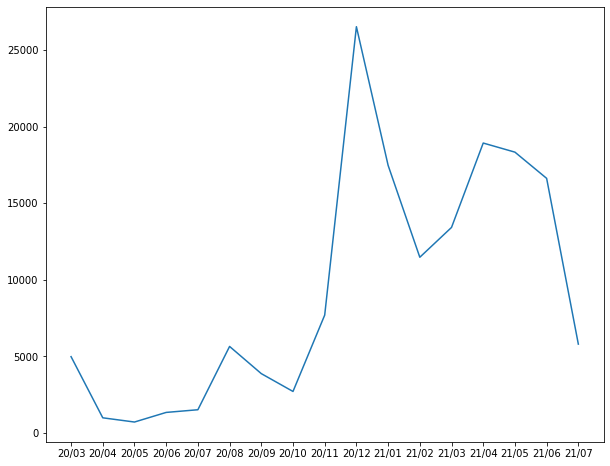

In [385]:
plt.figure(figsize=(10, 8))
plt.plot(month_data["month"],month_data["respective_confirmed"])
plt.show()

In [386]:
month_data2 = data.groupby(["month"],as_index=False).mean()

In [387]:
month_data2.head()

,month,respective_confirmed,respective_deads,respective_recovers
0,2003,177.642857,4.785714,191.928571
1,2004,32.633333,2.833333,121.700000
2,2005,22.677419,0.741935,43.419355
3,2006,44.366667,0.400000,37.733333
4,2007,48.580645,0.612903,53.096774


In [388]:
month_data2["month"] = real_month_list

In [389]:
month_data2.head()

,month,respective_confirmed,respective_deads,respective_recovers
0,20/03,177.642857,4.785714,191.928571
1,20/04,32.633333,2.833333,121.700000
2,20/05,22.677419,0.741935,43.419355
3,20/06,44.366667,0.400000,37.733333
4,20/07,48.580645,0.612903,53.096774


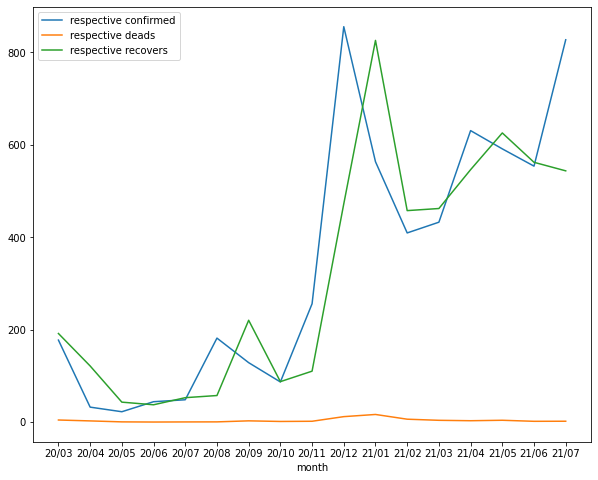

In [390]:
plt.figure(figsize=(10, 8))
plt.plot(month_data2["month"],month_data2["respective_confirmed"],label="respective confirmed")
plt.plot(month_data2["month"],month_data2["respective_deads"],label="respective deads")
plt.plot(month_data2["month"],month_data2["respective_recovers"],label="respective recovers")
plt.xlabel("month")
plt.legend()
plt.show()

In [287]:
month_data2.tail()

,month,respective_confirmed
12,21/03,432.741935
13,21/04,630.900000
14,21/05,591.387097
15,21/06,554.033333
16,21/07,827.428571


In [391]:
month_only_list = []
for m in month_data2["month"]:
  m1,m2 = m.split("/")
  month_only_list.append(m2)

In [392]:
month_only_list[:3]

['03', '04', '05']

In [393]:
month_data2["month_only"] = month_only_list

In [394]:
month_data2.head()

,month,respective_confirmed,respective_deads,respective_recovers,month_only
0,20/03,177.642857,4.785714,191.928571,03
1,20/04,32.633333,2.833333,121.700000,04
2,20/05,22.677419,0.741935,43.419355,05
3,20/06,44.366667,0.400000,37.733333,06
4,20/07,48.580645,0.612903,53.096774,07


In [395]:
month_data2["month_only"] = pd.to_numeric(month_data2["month_only"])#int로 바꿈

In [396]:
month_data2.head()

,month,respective_confirmed,respective_deads,respective_recovers,month_only
0,20/03,177.642857,4.785714,191.928571,3
1,20/04,32.633333,2.833333,121.700000,4
2,20/05,22.677419,0.741935,43.419355,5
3,20/06,44.366667,0.400000,37.733333,6
4,20/07,48.580645,0.612903,53.096774,7


In [400]:
from typing import List

Vector = List[float]
import math
def de_mean(xs: List[float])->List[float]:
    """x의 모든 데이터 포인트에서 평균을 뺌(평균을 0으로 만들기 위해)"""
    x_bar = np.mean(xs)
    return [x-x_bar for x in xs]
def sum_of_squares(xs: List[float])->List[float]:
    li = [x**2 for x in xs]
    return sum(li)
def variance(xs:List[float])->float:
    """편차의 제곱의 (거의) 평균"""
    n = len(xs)
    assert len(xs)>=2, "variance requires at least two elements"#0으로 나누는거 방지
    return sum_of_squares(de_mean(xs))/(n-1)
def standard_deviation(xs:List[float])->float:
    """표준편차는 분산의 제곱근"""
    return math.sqrt(variance(xs))
def dot(v: Vector, w: Vector) -> float:
    """Computes v_1 * w_1 + ... + v_n * w_n"""
    assert len(v) == len(w), "vectors must be same length"

    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def covariance(xs: List[float],ys:List[float]):
    assert len(xs) == len(ys),"xs and ys must have same number of elements"
    return dot(de_mean(xs),de_mean(ys))/(len(xs)-1)
def correlation(xs: List[float],ys:List[float])->float:
    """xs와 ys의 값이 각각의 평균에서 얼마나 떨어져 있는지 계산"""
    stdev_x = standard_deviation(xs)
    stdev_y = standard_deviation(ys)
    if stdev_x>0 and stdev_y>0:
        return covariance(xs,ys)/stdev_x/stdev_y
    else:
        return 0#편차가 존재하지 않는다면 상관관계는 0

In [401]:
month_data2.columns

Index(['month', 'respective_confirmed', 'respective_deads',
       'respective_recovers', 'month_only'],
      dtype='object')

In [403]:
month_data3 = month_data2.groupby(["month_only"],as_index=False).mean()

In [404]:
month_data3.head()

,month_only,respective_confirmed,respective_deads,respective_recovers
0,1,563.580645,16.774194,826.064516
1,2,409.535714,6.535714,457.821429
2,3,305.192396,4.457373,327.141705
3,4,331.766667,3.033333,334.050000
4,5,307.032258,2.483871,334.629032


In [405]:
correlation(month_data3["month_only"],month_data3["respective_confirmed"])

-0.05726840403260025

In [408]:
data_only_month_list = []
for m in data["month"]:
  data_only_month_list.append(m[2:])

In [409]:
data_only_month_list[:3]

['07', '07', '07']

In [410]:
data["only_month"] = data_only_month_list

달과 상관관계가 있을까?

In [411]:
data.head()

,누적검사,치료중,격리해제,사망자,확진자,기준일,respective_confirmed,respective_deads,respective_recovers,month,only_month
0,10766502,9220,151500,2033,162753,20210707,1212,1,740,2107,07
1,10735716,8749,150760,2032,161541,20210706,746,4,716,2107,07
2,10700134,8723,150044,2028,160795,20210705,711,2,430,2107,07
3,10685125,8444,149614,2026,160084,20210704,742,1,482,2107,07
4,10670617,8185,149132,2025,159342,20210703,794,1,813,2107,07


In [413]:
data["only_month"]=pd.to_numeric(data["only_month"])

In [414]:
correlation(data["only_month"],data["respective_confirmed"])

-0.03738053058032092

<function matplotlib.pyplot.show>

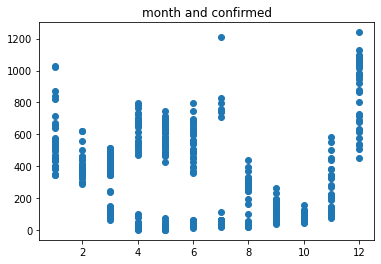

In [415]:
plt.title("month and confirmed")
plt.scatter(data["only_month"],data["respective_confirmed"])
plt.show

In [416]:
correlation(data["only_month"],data["respective_deads"])

-0.19783116177514673

<function matplotlib.pyplot.show>

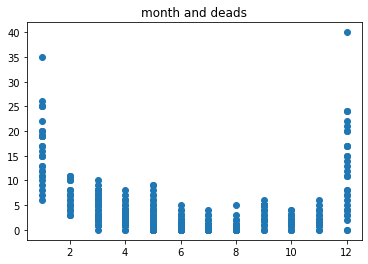

In [417]:
plt.title("month and deads")
plt.scatter(data["only_month"],data["respective_deads"])
plt.show

In [418]:
correlation(data["only_month"],data["respective_recovers"])

-0.3633508104221209

<function matplotlib.pyplot.show>

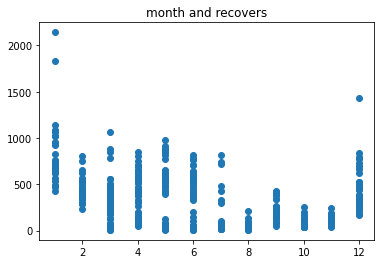

In [419]:
plt.title("month and recovers")
plt.scatter(data["only_month"],data["respective_recovers"])
plt.show